Prediction: We want to create a prediction model that predicts the GPA students expect for taking the course
        Some attribute that we are anticipating to improve the model are Course Name, Professor Name, When the course was held, professor income, professor rating, professor department, and number of student taking the course.


Supervised Machine Learning: training the model on input and output data 
- Classification 
- Regression 
- Clustering 


- Inputs: Course name, Professor Name, Quarter held, Professor income, # of students taking te course 
- Outputs: GPA from taking a course

A study that compared multinomial linear regression, decision tree regression, and random forest regression to identify which model was best at predicting GPA based on many factors (17 to be exact): 
https://www.mdpi.com/2076-3417/12/17/8403

## Multinomial Linear Regression 
Predicts a continuous value based on input features by fitting a linear equation to observed data. It assumes a linear relationship between the input variables (also called independent variables) and the output variable (dependent variable).
- Multinomial linear regression models a dependent variable Y on several independent variables X 
- 𝑌≈𝛽0+𝛽1𝑋1+𝛽2𝑋2+…+𝛽𝑗𝑋𝑗

Creating Multinomial Linear Regressions using python: https://www.geeksforgeeks.org/ml-multiple-linear-regression-using-python/

## Decision Tree Regression
- Can be used for regression and classification problems, model both numerical and categorical dependent variables 
- Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
- Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output

The advantages
- Selection of significant independent variables is performed automatically 
- Unimportant variables do not affect the result 
- Multicollinerarity has no effect on the quality of the output 

Decision tree should not be too large 
- Overfitting can occur 

Overfitting can be prevented by setting the depth of the decision tree or trimming the decision tree

Creating Decision Tree Regression using sklearn in python: https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

## Random Forest Regression
- Random Forest Regression is a versatile machine-learning technique for predicting numerical values. It combines the predictions of multiple decision trees to reduce overfitting and improve accuracy.
- A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction.
- Can be used to solve problems such as classification and prediction, measuring the significance of variables and the effect of variables on prediction, clustering or detection of outliers. 

Can eliminate some problems of decision trees 
- tree instability (small variations in the training set can result in different trees and different predictions for the same validation examples)
- the use training data for forests are bootstrap selections from the whole dataset 

- Observations that are in this selection are used to create the trees and estimate the training error 
- The accuracy of random forests is increased by allowing the trees to grow to a great depth 

Random forest is defined as a set of trees whose regression functions can be expressed in the form {𝑑(𝑥,𝛩𝑘), 𝑘=1,…,𝑆}
- x is the vectore of predictor values 
- 𝛩1,…,𝛩𝑆 are random equally distributed random vectors 
- 𝑘 is the number of trees in the forest 

Advantages 
- also works on smaller datasets, as well as the ability to work well for sets that contain many predictors 
- It performs well even if the data contains null/missing values
- It is highly stable as the average answers given by a large number of trees are taken
- We don’t have to segregate data into train and test as there will always be 30% of the data, which is not seen by the decision tree made out of bootstrap

Disadvantages 
- Random forest is highly complex compared to decision trees, where decisions can be made by following the path of the tree
- Training time is more than other models due to its complexity. Whenever it has to make a prediction, each decision tree has to generate output for the given input data

Creating Random Forest Regression using python: [https://www.geeksforgeeks.org/random-forest-regression-in-python/](https://www.geeksforgeeks.org/random-forest-regression-in-python/)

## Comparing Decision Trees and Random Forest Regression 
Decision Trees
- Decision trees normally suffer from the problem of overfitting if it’s allowed to grow without any control
- A single decision tree is faster in computation
- When a data set with features is taken as input by a decision tree, it will formulate some rules to make predictions

Random Forest 
- Random forests are created from subsets of data, and the final output is based on average or majority ranking; hence the problem of overfitting is taken care of
- It is comparatively slower
- Random forest randomly selects observations, builds a decision tree, and takes the average result. It doesn’t use any set of formulas

## Study's  Discussion 
Random forest model is generally a better predictor than the decision tree model 
- Random forest model generates many trees that are not mutually coorelated, and this contributes to results that are more reliable and ultimately more accurate than simple decsion trees

Based on the MAPE metric on test set, the mosel created by backward regression procedure of linea regression provided the best result 

However, the random forest model achieved the best average accuracy on five validation sets in cross-validation procedure 
- best generalization accuracy on the new data 

This study recommends the use of a random forest as a starting model for modeling learning outcomes based on other independent variables 

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings



from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
warnings.filterwarnings('ignore')

/var/folders/pc/skjhh69x6c365spmwqcs6p9h0000gn/T/ipykernel_11977/1239471761.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
merged_df = pd.read_csv('merged.csv')

In [3]:
# merged_df

In [4]:
# Extracting features
x = merged_df[['Quarter', 'Department', 'Income']]

# Extracting target variable
y = merged_df['Average_Grade_Received']

# Checking shapes for target and feature variables
print("Shape of features (x):", x.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (x): (45105, 3)
Shape of target variable (y): (45105,)


In [7]:
label_encoder = LabelEncoder()

x_categorical = merged_df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = merged_df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
 
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(oob_score=True, random_state=0)

In [8]:
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(x)
 
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9998964593891855
Mean Squared Error: 2.2168684181354472e-06
R-squared: 0.9999859494915598


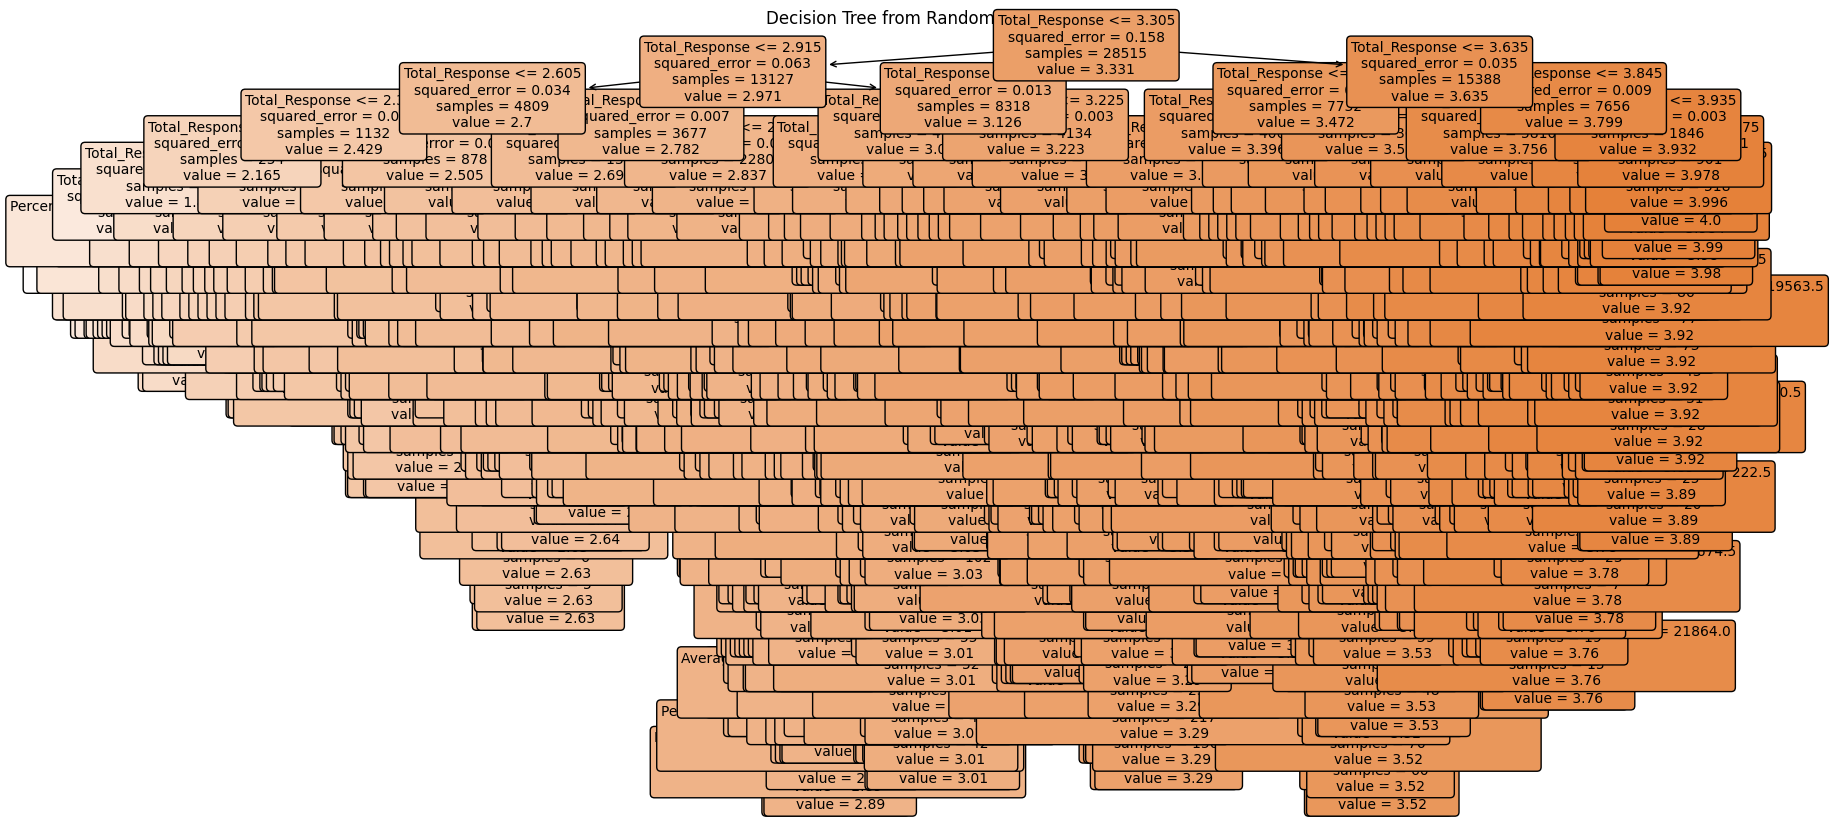

In [14]:
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=merged_df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [3]:
# Assuming 'merged_df' is your DataFrame and contains all your data
X = merged_df[['Quarter', 'Department', 'Income']]  # Features
y = merged_df['Average_Grade_Received']  # Target variable

# Split the data - 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Example preprocessing for numerical and categorical data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Creating transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ])

# Fit on the training data and transform both training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [7]:
# Initialize and train your model
model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [8]:
# Predict on the test set
y_pred = model.predict(X_test_preprocessed)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Out-of-Bag Score: {model.oob_score_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.28392971898699015
Mean Squared Error: 0.11136646738705136
R-squared: 0.29560777813154926
